In [63]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import json

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

cwd = "/Users/jonathanlin/Documents/GitHub/research_transfer/datasets/Animal_Kingdom/pose_estimation/dataset/"

In [64]:
class ak_dataset(Dataset):
    """dataset for Animal Kingdom"""

    def __init__(self, csv_file, root_dir, animal_label, transform=None):
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

        self.label_to_int = {}
        if animal_label == "animal_parent_class":
            self.label_to_int = {
                "Reptile": 0,
                "Bird": 1,
                "Mammal": 2,
                "Amphibian": 3,
                "Fish": 4
            }

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        # this dictionary converts the string labels to integers
        
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        
        label = self.label_to_int[self.landmarks_frame.iloc[idx, 1]]

        image = io.imread(img_name)
        image = np.reshape(image, (3, 360, 640))
        image = (torch.from_numpy(image)).to(torch.float32)

        return (image, label)

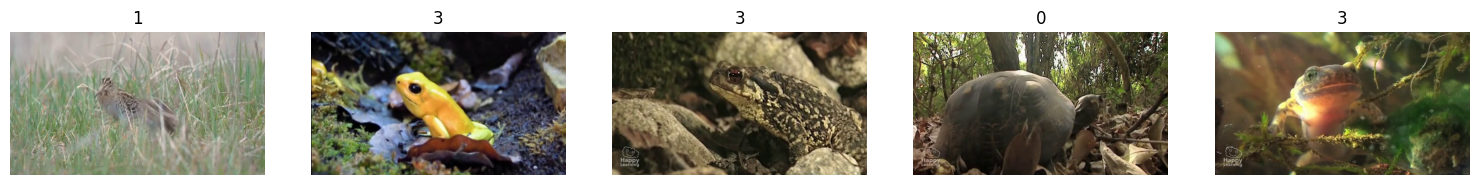

In [65]:
dataset = ak_dataset(csv_file= "dataset_test.csv",
                    root_dir= cwd,
                    animal_label = "animal_parent_class")

fig = plt.figure()
fig.set_figwidth(15)

for i in range(len(dataset)):

    idx = np.random.randint(len(dataset))
    sample = dataset[idx]

    ax = plt.subplot(1, 5, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')

    image = sample[0].to(torch.int16).cpu().numpy()
    # reshape cuz of pytorch and numpy convention for images
    image = np.reshape(image, (360, 640, 3))

    plt.imshow(image, vmin=0, vmax=255)
    plt.title(sample[1])

    if i == 4:
        plt.show()
        break